In [1]:
from metadynminer.hills import Hills
from metadynminer.fes import Fes
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#load hills
h1 = Hills(name="../data/acealanme1d", periodic=[True], cv_per=[[-np.pi, np.pi]])
h2 = Hills(name="../data/acealanme", periodic=[True,True], cv_per=[[-np.pi, np.pi], [-np.pi, np.pi]])
h3 = Hills(name="../data/acealanme3d", periodic=[True,True,True], cv_per=[[-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi]])

In [3]:
#prepare FES
metadynminer_cv1_fast = Fes(h1, resolution=256, original=False).fes.T
#np.savetxt("metadynminer_cv1_fast.txt", metadynminer_cv1_fast, delimiter=" ")
metadynminer_cv1_original = Fes(h1, resolution=256, original=True).fes.T
#np.savetxt("metadynminer_cv1_original.txt", metadynminer_cv1_original, delimiter=" ")
metadynminer_cv2_fast = Fes(h2, resolution=256, original=False).fes.T
#np.savetxt("metadynminer_cv2_fast.txt", metadynminer_cv2_fast, delimiter=" ")
metadynminer_cv2_original = Fes(h2, resolution=256, original=True).fes.T
#np.savetxt("metadynminer_cv2_original.txt", metadynminer_cv2_original, delimiter=" ")
metadynminer_cv3_fast = Fes(h3, resolution=64, original=False).fes.T
#np.savetxt("metadynminer_cv3_fast.txt", metadynminer_cv3_fast.reshape(metadynminer_cv3_fast.shape[0], -1), delimiter=" ")
metadynminer_cv3_original = Fes(h3, resolution=64, original=True).fes.T
#np.savetxt("metadynminer_cv3_original.txt", metadynminer_cv3_original.reshape(metadynminer_cv3_original.shape[0], -1), delimiter=" ")

#prepare plumed FES
#os.system('plumed sum_hills --hills "./acealanme1d" --bin 256 --outfile plumed_acealanme1d.da')
#os.system('plumed sum_hills --hills "./acealanme" --bin 256,256 --outfile plumed_acealanme.da')
#os.system('plumed sum_hills --hills "./acealanme3d" --bin 256,256,256 --outfile plumed_acealanme3d.da')

#load plumed FES
plumed1 = np.loadtxt("plumed_acealanme1d.dat")
plumed1 = np.reshape(plumed1[:,1], (256))
plumed1 = plumed1 - np.min(plumed1)

plumed2 = np.loadtxt("plumed_acealanme.dat")
plumed2 = np.reshape(plumed2[:,2], (256,256))
plumed2 = plumed2 - np.min(plumed2)

plumed3 = np.loadtxt("plumed_acealanme3d_64.dat")
plumed3 = np.reshape(plumed3[:,3], (64,64,64))
plumed3 = plumed3 - np.min(plumed3)

#compare
mean_error_limit_original = 1e-3
mean_error_limit_fast = 1

max_error_limit_original = 1e-2
max_error_limit_fast = 4

compare_plumed = [plumed1, plumed2, plumed3]
compare_mm_fast = [metadynminer_cv1_fast, 
                   metadynminer_cv2_fast, 
                   metadynminer_cv3_fast]
compare_mm_original = [metadynminer_cv1_original,
                       metadynminer_cv2_original,
                       metadynminer_cv3_original]

for cv in range(len(compare_plumed)):
    mean_error = np.mean(compare_plumed[cv]-compare_mm_fast[cv])
    max_error = np.max(np.abs(compare_plumed[cv]-compare_mm_fast[cv]))

    if np.abs(mean_error) < mean_error_limit_fast:
        print(f"Algorithm: Fast, CV = {cv+1}: \tPASSED, mean of errors = {mean_error}.")
    else:
        print(f"Algorithm: Fast, CV = {cv+1}: \tFAILED, mean of errors = {mean_error}.")

    if max_error < max_error_limit_fast:
        print(f"Algorithm: Fast, CV = {cv+1}: \tPASSED, max error = {max_error}.")
    else:
        print(f"Algorithm: Fast, CV = {cv+1}: \tFAILED, max error = {max_error}.")

    mean_error = np.mean(compare_plumed[cv]-compare_mm_original[cv])
    max_error = np.max(np.abs(compare_plumed[cv]-compare_mm_original[cv]))

    if np.abs(mean_error) < mean_error_limit_original:
        print(f"Algorithm: Original, CV = {cv+1}: \tPASSED, mean of errors = {mean_error}.")
    else:
        print(f"Algorithm: Original, CV = {cv+1}: \tFAILED, mean of errors = {mean_error}.")

    if max_error < max_error_limit_original:
        print(f"Algorithm: Original, CV = {cv+1}: \tPASSED, max error = {max_error}.")
    else:
        print(f"Algorithm: Original, CV = {cv+1}: \tFAILED, max error = {max_error}.")

Constructing FES: 100%|██████████| 262144/262144 [03:31<00:00, 1240.29it/s]


Algorithm: Fast, CV = 1: 	PASSED, mean of errors = -0.12706082548508563.
Algorithm: Fast, CV = 1: 	PASSED, max error = 0.888422015761293.
Algorithm: Original, CV = 1: 	PASSED, mean of errors = -1.5488321736256694e-10.
Algorithm: Original, CV = 1: 	PASSED, max error = 6.583604772458784e-10.
Algorithm: Fast, CV = 2: 	PASSED, mean of errors = -0.16706817317908657.
Algorithm: Fast, CV = 2: 	PASSED, max error = 1.5483647841175028.
Algorithm: Original, CV = 2: 	PASSED, mean of errors = -2.691467101273437e-11.
Algorithm: Original, CV = 2: 	PASSED, max error = 5.254747748040245e-10.
Algorithm: Fast, CV = 3: 	PASSED, mean of errors = -0.9922609552379945.
Algorithm: Fast, CV = 3: 	FAILED, max error = 8.30947769627467.
Algorithm: Original, CV = 3: 	PASSED, mean of errors = -4.212892770099133e-10.
Algorithm: Original, CV = 3: 	PASSED, max error = 9.213465546054067e-10.


Text(0.5, 1.0, 'Fast')

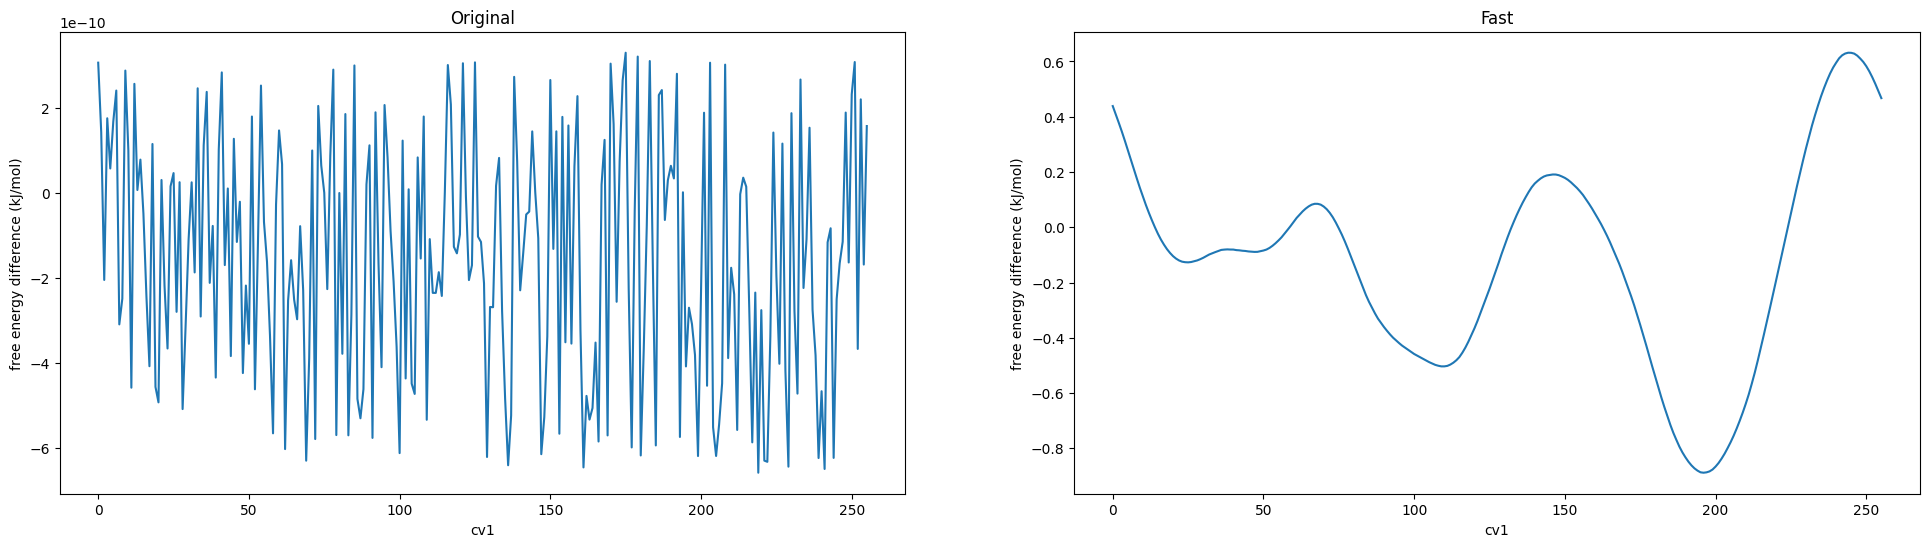

In [4]:
plt.figure(figsize=(24,6))
plt.subplot(121)
plt.plot(range(256), (plumed1-metadynminer_cv1_original))
plt.xlabel('cv1')
plt.ylabel('free energy difference (kJ/mol)')
plt.title("Original")
plt.subplot(122)
plt.plot(range(256), (plumed1-metadynminer_cv1_fast))
plt.xlabel('cv1')
plt.ylabel('free energy difference (kJ/mol)')
plt.title("Fast")

Text(0.5, 1.0, 'Fast')

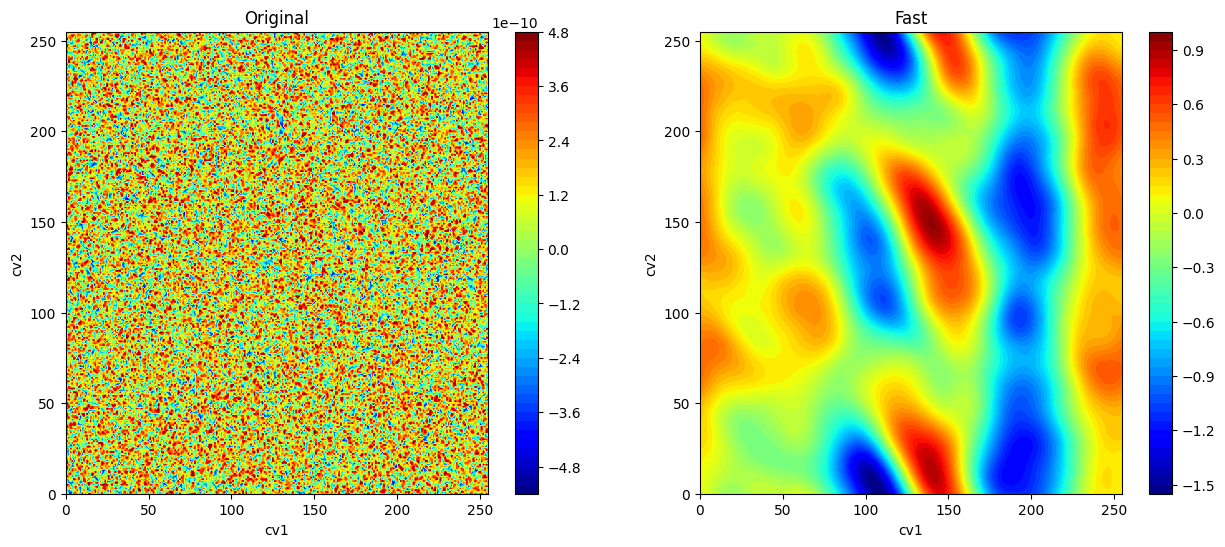

In [5]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.contourf(range(256), range(256), (plumed2-metadynminer_cv2_original), levels=50, cmap="jet")
plt.xlabel('cv1')
plt.ylabel('cv2')
plt.colorbar()
plt.title("Original")
plt.subplot(122)
plt.contourf(range(256), range(256), (plumed2-metadynminer_cv2_fast), levels=50, cmap="jet")
plt.xlabel('cv1')
plt.ylabel('cv2')
plt.colorbar()
plt.title("Fast")

In [2]:
cv3_pl_mm_orig = mm.Fes(hills=h3, resolution=64, original=True, calculate_new_fes=False)
cv3_pl_mm_orig.fes = (plumed3-metadynminer_cv3_original)
cv3_pl_mm_fast = mm.Fes(hills=h3, resolution=64, original=False, calculate_new_fes=False)
cv3_pl_mm_fast.fes = (plumed3-metadynminer_cv3_fast)

In [3]:
cv3_pl_mm_orig.plot()

Widget(value="<iframe src='http://localhost:42735/index.html?ui=P_0x7fafbd6afca0_0&reconnect=auto' style='widt…

In [5]:
cv3_pl_mm_fast.plot(levels=[2,4,6,8])

Widget(value="<iframe src='http://localhost:42735/index.html?ui=P_0x7fafaa919130_2&reconnect=auto' style='widt…